# Wholesale Customers Analysis (Download Data)

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail)

In [ ]:
#Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Import source data

In [2]:
df = pd.read_csv("Downloads\Wholesale Customer.csv")

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?



In [4]:
df['Total Spending'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicatessen']

In [34]:
df.drop('Total',axis= 1, inplace=True)

In [35]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [38]:
df_region = pd.DataFrame(df.groupby(['Region'])['Total Spending'].sum())

In [39]:
df_region

,Total Spending
Region,
Lisbon,2386813
Oporto,1555088
Other,10677599


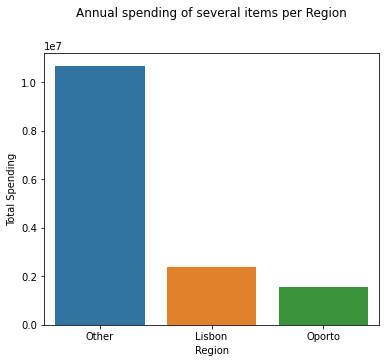

In [6]:
plt.figure(figsize=(6,5))
plt.title("Annual spending of several items per Region\n\n")
sns.barplot(x=df['Region'],y=df['Total Spending'],data=df,ci=None, estimator=np.sum)

In [40]:
df_channel = pd.DataFrame(df.groupby(['Channel'])['Total Spending'].sum())

In [41]:
df_channel

,Total Spending
Channel,
Hotel,7999569
Retail,6619931


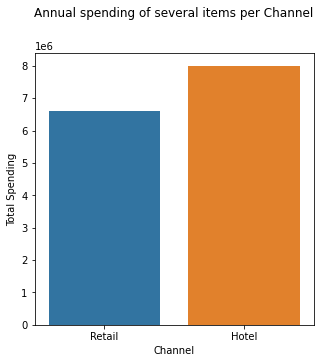

In [7]:
plt.figure(figsize=(5,5))
plt.title("Annual spending of several items per Channel\n\n")
sns.barplot(x=df['Channel'],y=df['Total Spending'],data=df,ci=None, estimator=np.sum)

Q -- Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

A --- From Above barplot we can say that Total Spend is more for Region 'Other'

and Total Spend is less for Region 'Oporto' 

Also, channel 'Hotel' seems to spend more compare to other channel 'Retail'

# 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [82]:
pd.pivot_table(df,['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'], index=['Region', 'Channel'])

Delicatessen  Detergents_Paper         Fresh       Frozen  \
Region Channel                                                              
Lisbon Hotel     1197.152542        950.525424  12902.254237  3127.322034   
       Retail    1871.944444       8225.277778   5200.000000  2584.111111   
Oporto Hotel     1105.892857        482.714286  11650.535714  5745.035714   
       Retail    1239.000000       8410.263158   7289.789474  1540.578947   
Other  Hotel     1518.284360        786.682464  13878.052133  3656.900474   
       Retail    1826.209524       6899.238095   9831.504762  1513.200000   

                     Grocery          Milk  
Region Channel                              
Lisbon Hotel     4026.135593   3870.203390  
       Retail   18471.944444  10784.000000  
Oporto Hotel     4395.500000   2304.250000  
       Retail   16326.315789   9190.789474  
Other  Hotel     3886.734597   3486.981043  
       Retail   15953.809524  10981.009524

Looking at the above pivot table, we can say that categories like Milk, Grocery & Detergents_Paperhave higher spend in 
the Retail channel compare to Hotel, across all regions. 

On the other hand, Fresh and Frozen have higher spending in the Hotel channel versus Retail, across all regions.

Also altogether annual spending is minimum for Item-Delicatessen and maximum for Fresh & Grocery,acrros all region and channel.

In [84]:
df1 = pd.DataFrame(pd.pivot_table(df,['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'], index=['Region', 'Channel']))

In [86]:
df1.describe()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1459.747288,4292.450201,10125.356053,3027.858047,10510.073325,6769.538905
std,331.821030,3929.168253,3361.725243,1580.616424,7073.222791,3970.767546
min,1105.892857,482.714286,5200.000000,1513.200000,3886.734597,2304.250000
25%,1207.614407,827.643204,7925.218296,1801.461988,4118.476695,3582.786629
50%,1378.642180,3924.881759,10741.020238,2855.716573,10174.654762,6530.496432
75%,1749.228233,7893.767857,12589.324607,3524.505864,16233.189223,10385.697368
max,1871.944444,8410.263158,13878.052133,5745.035714,18471.944444,10981.009524


# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [ ]:
#CV = std/mean

In [99]:
list = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
list.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [109]:
for i in list.columns:
    cv = (df[i].std())/(df[i].mean())
    print("cv for ",i, "is --- ", cv)

cv for  Fresh is ---  1.0539179237473149
cv for  Milk is ---  1.2732985840065414
cv for  Grocery is ---  1.1951743730016824
cv for  Frozen is ---  1.5803323836352914
cv for  Detergents_Paper is ---  1.6546471385005155
cv for  Delicatessen is ---  1.8494068981158382


In [110]:
#Coefficient of variation is high for item - Delicatessen , hence we can say that it shows the most inconsistent behaviour
#Coefficient of variation is low for item - Fresh  , hence we can say that it shows the least inconsistent behaviour

# 1.4 Problem Are there any outliers in the data?

In [ ]:
#Ouliers can be found using boxplot

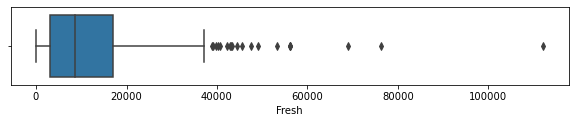

In [132]:
plt.figure(figsize=(10,10))

plt.subplot(6,1,1)
sns.boxplot(df['Fresh'])


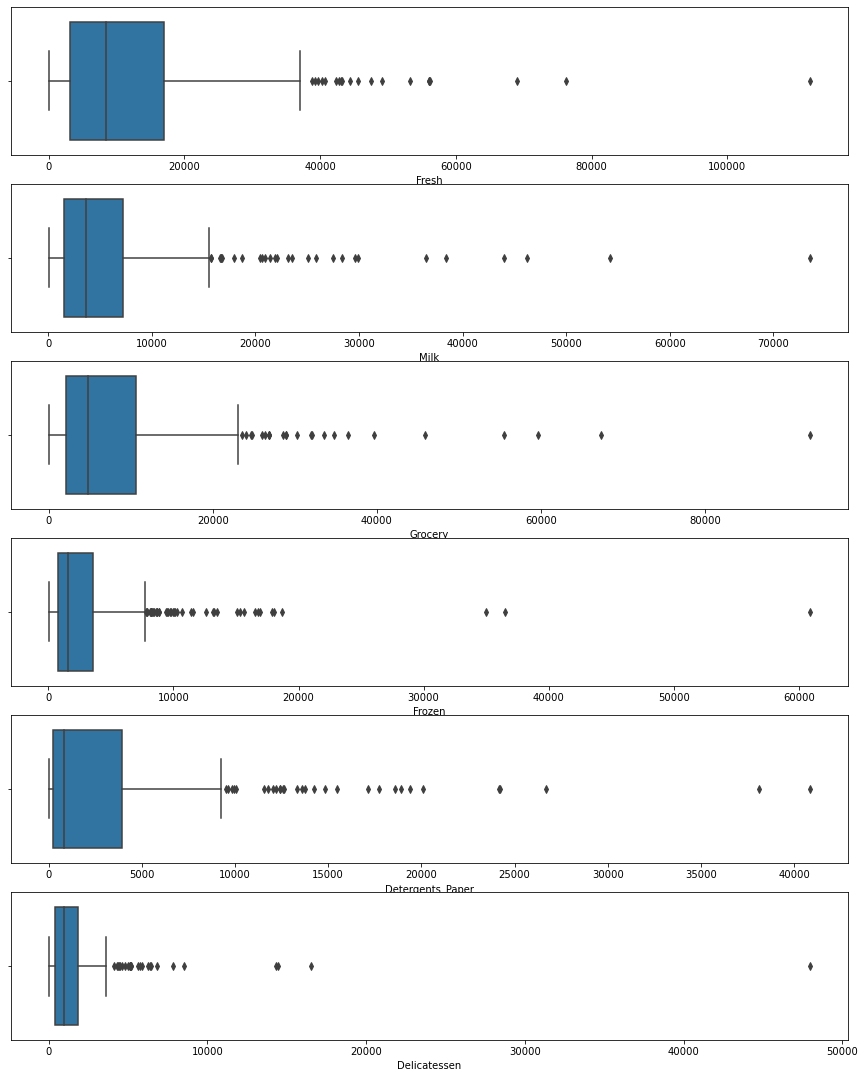

In [133]:
plt.figure(figsize=(15,19))

j=1
for i in list.columns:
    plt.subplot(6,1,j)
    sns.boxplot(list[i])
    j=j+1